In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb
import numpy as np

In [2]:
caged_files = sorted(glob('CAGEDMOV202101/CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=";") for file in caged_files), ignore_index=True)

In [3]:
def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(10,6)):
    titledict = {'fontweight':'bold', 'fontsize': 15}
    labeldict = {'fontsize': 13}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    plt.show()

In [4]:
caged_files

['CAGEDMOV202101\\CAGEDMOV202101.txt',
 'CAGEDMOV202101\\CAGEDMOV202102.txt',
 'CAGEDMOV202101\\CAGEDMOV202103.txt']

In [5]:
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [6]:
main_df['Tipo de movimentação'] = main_df['tipomovimentação'].map({
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'})

In [7]:
conditions = [
    (main_df['tipomovimentação'].isin([10,20,25,35,70])),
    (main_df['tipomovimentação'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (main_df['tipomovimentação'].isin([99]))
    ]

values = ['Admitido', 'Desligado', 'Não identificado']

main_df['movimento'] = np.select(conditions, values)

In [8]:
def determine_social_class(row):
    value = 0
    if row['salário'] <= 2090:
        value = 1
    elif row['salário'] <= 4180:
        value = 2
    elif row['salário'] <= 10450:
        value = 3
    elif row['salário'] <= 20900:
        value = 4
    else:
        value = 5
    return value

main_df['classe_social'] = main_df.apply(determine_social_class, axis=1)

In [9]:
main_df['Classe social'] = main_df['classe_social'].map({
0:'Não determinado',
1:'Classe E',
2:'Classe D',
3:'Classe C',
4:'Classe B',
5:'Classe A'
})

In [10]:
main_df[['Classe social', 'movimento']].head()

,Classe social,movimento
0,Classe E,Desligado
1,Classe E,Desligado
2,Classe E,Admitido
3,Classe C,Desligado
4,Classe E,Desligado


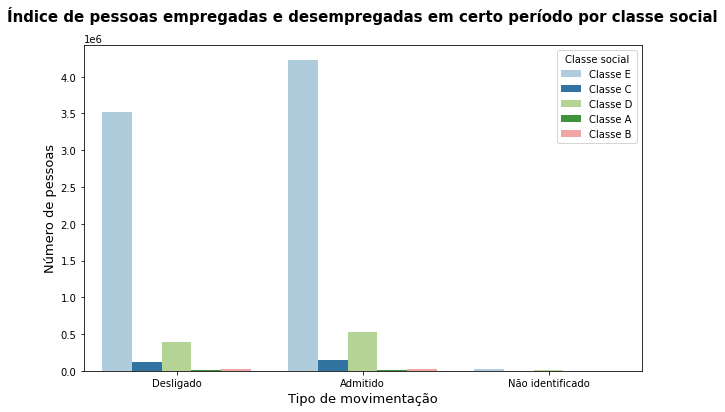

In [11]:
plot(
    lambda: sb.countplot(hue='Classe social', x='movimento',data = main_df, palette='Paired'),
    title="Índice de pessoas empregadas e desempregadas em certo período por classe social",
    xlabel="Tipo de movimentação",
    ylabel="Número de pessoas"
)